Osnabrück University - Computer Vision (Winter Term 2016/17) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 03: Morphological Operations¶

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, November 27, 2016**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (complex numbers) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *complex number*, what is the *complex plane*, how are complex numbers usually denoted?

gtfo

**b)** What is the *real* and the *imaginary* part of a complex number? What is the *absolute value* of a complex number? What is the *complex conjugate*?

**c)** What are polar coordinates? What are their advantages? Can you convert between cartesian and polar coordinates? Can you write down $i=\sqrt{-1}$ in polar coordinates? What about $\sqrt{i}$?

I did this an then jupyter decided to crash while parsing latex so all is lost. Now I don't care anymore.

**d)** [bonus task] Python, and also numpy, support calculations with complex numbers. Consult the documentation to find out details.

## Assignment 1: Morphological operators [8 Points]

This exercise will elaborate on the basic morphological operators of *erosion* and *dilation* (cf. CV-05 slides 4-14).

### a) Binary convolution

Describe in your own words the morphological operations *erosion* and *dilation*. Compare them with 2D convolution, name commonalities and differences.

**For both operations, a binary kernel slides over the image. If the patch around the current center pixel exactly matches the kernel (all 1s overlap with the kernel 1s), the resulting pixel value is 1 else 0 (erosion). For dilation, he 1-condition is that at least one 1-pixel in the patch must overlap a 1-pixel in the kernel.**

### b) Duality

Proof that *erosion* and *dilation* are *dual* operators, i.e.

$$ g^{\ast}\oplus S = (g\ominus S)^{\ast}\qquad\text{and}\qquad
g^{\ast}\ominus S = (g\oplus S)^{\ast}$$

here $g^{\ast}$ denotes the inverted binary image, i.e. $g^{\ast}(x,y) = 1 - g(x,y) = \neg g(x,y)$, i.e. 1-pixel become 0 and 0-pixel become 1.

**I only managed to prove that it is not true if you use the boolean logic formulation.**

### c) Superposition

As *erosion* and *dilation* have been introduced for binary images, the notion of *linearity* is not really appropriate here. However, some weaker version, called *superposition* can be defined: instead of forming linear combination, one takes the logical disjunktion:

$$(g_1\lor g_2)(x,y) := g_1(x,y)\lor g_2(x,y)$$

Check if *erosion* and *dilation* are "compatible" with superposition, i.e. if first *eroding*/*dilating* two images and superposing the result is the same as first superposing the images and then *eroding*/*dilating* the result.

Dilation
========
* $(g_1 \vee g_2) \oplus S = \bigvee\bigvee S \wedge (g_1 \vee g_2) = \bigvee\bigvee (S\wedge g_1 \vee S \wedge g_2)$
* $g_1\oplus S \vee g_2\oplus S = \bigvee\bigvee S \wedge g_1 \vee \bigvee\bigvee S \wedge g_2 = \bigvee\bigvee (S\wedge g_1 \vee S \wedge g_2)$

Erosion
========
* $(g_1 \vee g_2) \ominus S = \bigwedge\bigwedge S \wedge (g_1 \vee g_2) = \bigwedge\bigwedge (S \wedge g_1 \vee S \wedge g_2)$
* $g_1\ominus S \vee g_2\ominus S = \bigwedge\bigwedge S \wedge g_1 \vee \bigwedge\bigwedge S \wedge g_1$

**These cannot be simplified further and are not identical. Hence only dilation is compatible with superposition**

### d) Chaining

Show that *dilation* and *erosion* have the following properties: given two structering elements $S_1$ and $S_2$, it holds

\begin{align}
  (g\oplus S_1)\oplus S_2 & = g\oplus (S_1\oplus S_2) & = (g\oplus S_2)\oplus S_1 \\
  (g\ominus S_1)\ominus S_2 & = g\ominus (S_1\oplus S_2) & = (g\ominus S_2)\ominus S_1 \\  
\end{align}

What are the practical consequences?

<b>
* When multiple dilation with different structuring elements is required, computational cost can be reduced why first eroding the structuring elements with one another, instead of the (usually larger) image.
* Multiple dilations can always be done in a single operation by precomputing the required structuring element
* Multiple erosions can be likewise combined by dilating the structuring elements
* The order of dilations or the order of erosions is irrelevant
</b>

## Assignment 2: Application [6 Points]


### a) Boundary extraction

Extract the boundary of a shape using opening or closing. You may use `binary_opening` or `binary_closing` from `scipy.ndimage.morphology`.

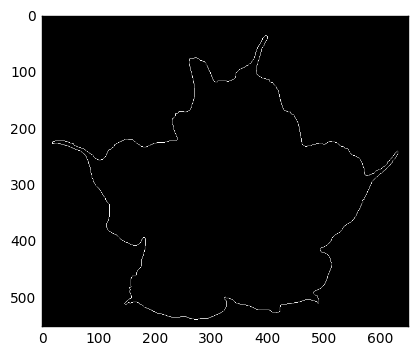

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph

def my_boundary(img):
    """
    Compute boundary of binary image.

    Parameters
    ----------
    img : ndarray of bools
        A binary image.
        
    Returns
    -------
    boundary : ndarray of bools
        The boundary as a binary image.
    """
    
    structuring_element = np.ones((3,3))
    structuring_element[0,0] = 0
    structuring_element[2,2] = 0
    structuring_element[0,2] = 0
    structuring_element[2,0] = 0
    return img ^ morph.binary_erosion(img, structuring_element)
   
    
img = plt.imread("engelstrompete.png") > 0
plt.gray()
plt.imshow(my_boundary(img))
plt.show()

### b)  Distance transform

Implement distance transform according to the ideas of (CV-05 slides 34ff).  Discuss the effect of different structuring elements.

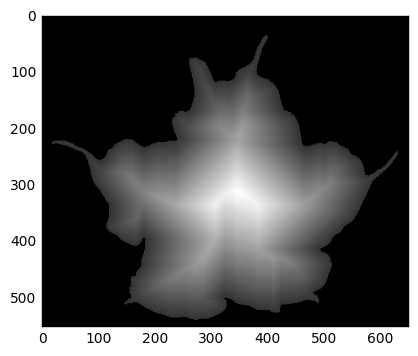

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import morphology as morph, generate_binary_structure

def my_distance_transform(img):
    """
    Distance transform of binary image.

    Parameters
    ----------
    img : ndarray of bools
        A binary image.
        
    Returns
    -------
    dt : ndarray of ints
        The distance transform of the input image.
    """

    dt1 = np.zeros(img.shape, np.int32)
    c = 0
    img_wo_boundary = img.copy()
    # while not completely eroded
    while np.any(img_wo_boundary):
        # find boundary
        boundary = my_boundary(img_wo_boundary)
        img_wo_boundary ^= boundary # shave of current boundary
        dt1[boundary] = c # boundary can be used as mask
        c += 1 # make brighter with every step

    return dt1



img = plt.imread("engelstrompete.png") > 0
plt.gray()
plt.imshow(my_distance_transform(img)+50*img)
plt.show()

**The gradient will be steeper and less smooth for larger structuring elements.**

### c) Morphing

Write a function `my_morph` that implements morphing according to (CV-05 slide 41). You may use your function `my_distance_transform` from part b), or the function `distance_transform_edt` from `scipy.ndimage.morphology`.

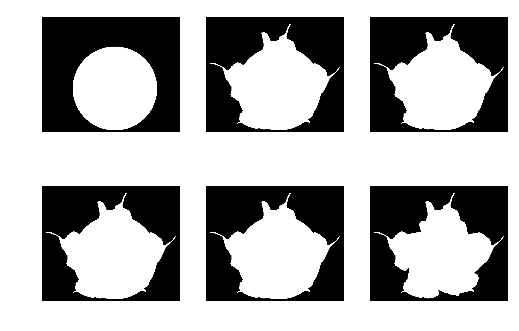

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph


def my_morph(A,B,ratio):
    """
    Morphing from binary image A to image B.

    Parameters
    ----------
    A : ndarray of bools
        A binary image (start).
    B : ndarray of bools
        A binary image (target), same shape as A.
    ratio : float from 0.0 to 1.0
        The ratio of image A and image B.
        0.0=only image A, 1.0=only image B.
        
    Returns
    -------
    morph : ndarray of bools
        A binary intermediate image between A and B.
    """

    d_a = my_distance_transform(A)
    d_b = my_distance_transform(B)

    result = (ratio * d_b + (1 - ratio) * d_a)
    return result > 0



img1 = plt.imread("kreis.png") > 0
img2 = plt.imread("engelstrompete.png") > 0

plt.gray()
for i, ratio in enumerate(np.linspace(0, 1, 6), 1):
    plt.subplot(2, 3, i)
    plt.imshow(my_morph(img1, img2, ratio))
    plt.axis('off')
plt.show()

## Assignment 3: Implementation: Skeletonization [6 Points]

### a) Skeletonization with hit-or-miss

Explain in your own words, how the hit-or-miss operator can be used for skeletonization (cf CV-05 slide 49).  

### b) Implementation of skeletonization

Now use this method to implement your own skeletonization function. It is ok to use
`scipy.ndimage.morphology.binary_hit_or_miss` here (but of course *not* `skimage.morphology.skeletonize` or similar functions). Compare your result with (CV-05 slide 50). Note that computing the skeleton using this method may take some time ...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph

def my_skeletonize(img):
    """
    Compute the skeloton of a binary image using hit_or_miss operator.
    
    Parameters
    ----------
    img : ndarray of bools
        Binary image to be skeletonized.
    
    Returns
    -------
    skeleton : ndarray of bools
        The skeleton of the input image.
    """
    
    # no idea why this works  ̄\_(ツ)_/ ̄
    # these are the elements from the slides
    element1 = np.array(
                [[0,1,1],
                 [0,1,1],
                 [0,1,1]])
    element2 = np.array(
                [[1,1,1],
                 [0,1,1],
                 [0,0,1]])
    elements = [
            element1,
            np.fliplr(element1),
            element1.T,
            np.flipud(element1.T),
            element2,
            np.fliplr(element2.T),
            np.fliplr(element2),
            element2.T
        ]

    # this iteratively removes the pieces of the image for which the structuring
    # element hits (why does it work #clueless)
    skeleton = img.copy()
    while True:
        last = skeleton
        for structuring_element in elements:
            # this computes parts we can erase
            hm = morph.binary_hit_or_miss(skeleton, structuring_element) 
            skeleton = skeleton & ~hm  # and not X removes X's elements from img
        if np.all(skeleton == last): # end if nothing more to erase
            break
    return skeleton


img = plt.imread("engelstrompete.png") > 0
skel = my_skeletonize(img)
result = morph.distance_transform_cdt(img, metric = 'taxicab') + 50*img
result[morph.binary_dilation(skel)] = 0
plt.gray()
plt.imshow(result)
plt.show()